# TITANIC SURVIVAL PREDICTION(TASK -1)

Titanic survival prediction using machine learning is a compelling example of how advanced data analytics can be applied to historical data to gain valuable insights. By leveraging various machine learning algorithms and techniques, data scientists and researchers have been able to analyze the Titanic dataset, which contains information about passengers' demographics, ticket classes, family relationships, and more. 

These algorithms can then predict the likelihood of an individual passenger surviving the tragic sinking of the Titanic in 1912. This predictive modeling not only provides a fascinating glimpse into the past but also serves as a testament to the power of modern technology to extract meaningful patterns from complex datasets.

It highlights the potential of machine learning to uncover hidden correlations and assist in making data-driven decisions in various domains beyond historical events.

---------------------------------

The dataset that i have used here is name as **tested.csv**

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

## In this "TITANIC SURVIVAL MACHINE LEARNING MODEL" USING ML , I used this following steps to make the predctions.They are:

**1. Importing Libraries**

**2. Dataset Loading**

**3. Selection of the features**

**4. Imputing and displaying of the missing values**

**5. Exploratory Data Analysis**

**6. Building of the Model**

**7.  Accuracy and predictions using Logistic Regression**

**----------------------------------------------------------------------------------------------------**

# 1. Importing Libraries

All the libaries that are to be used in this model must be imported in this at the start for eg the matplotlib,os,numpy etc 

It is done so that so that all functions work effectively.

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import QuantileTransformer,StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,accuracy_score

# 2. Dataset loading

The dataset "tested.csv" contains all the data and their values. The dataset contains **PassengerId,Survived,Passenger Class,Name, Sex,Age,Ticket,Fare,Cabin,Embarked**

In [90]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [91]:
#displays the data from the start till the first five
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
df.head(39)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [93]:
#to display from the end
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [94]:
#specifies the shape of the dataset
df.shape

(418, 12)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [96]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [97]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [98]:
#checks and displays whether some values are empty or not
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 3. Selection of features

The tables which not will be used much is deleted and rest of the columned are used

In [99]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [100]:
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.191514
Parch       0.159120
SibSp       0.099943
Age        -0.000013
Pclass     -0.108615
Name: Survived, dtype: float64

**We are dropping the following two columns as it will not be used much further**

In [101]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

## Heatmap

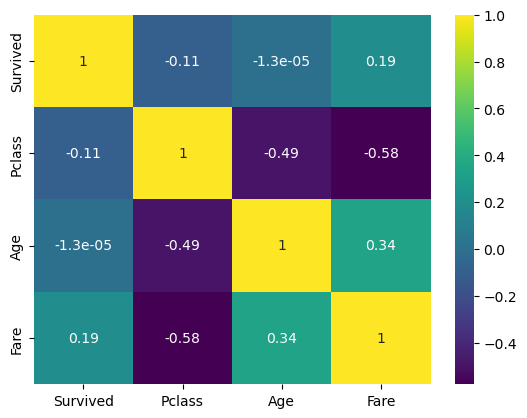

In [102]:
corr_df = df.corr(numeric_only=True)
sns.heatmap(corr_df,cmap='viridis',annot=True)
plt.show()


# 4. Inputting and displaying of missing values

In [103]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.round(2)  # Round percentages to two digits
}, index=df.columns)
result_df

,no of missing values,percentage
Survived,0,0.00
Pclass,0,0.00
Sex,0,0.00
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23
Embarked,0,0.00


**the cabin column and its all values are deleted here**

In [104]:
df.drop(['Cabin'],axis=1,inplace=True)

## Histograms

The following two are the histograms for the age before the filling of missing values and after that

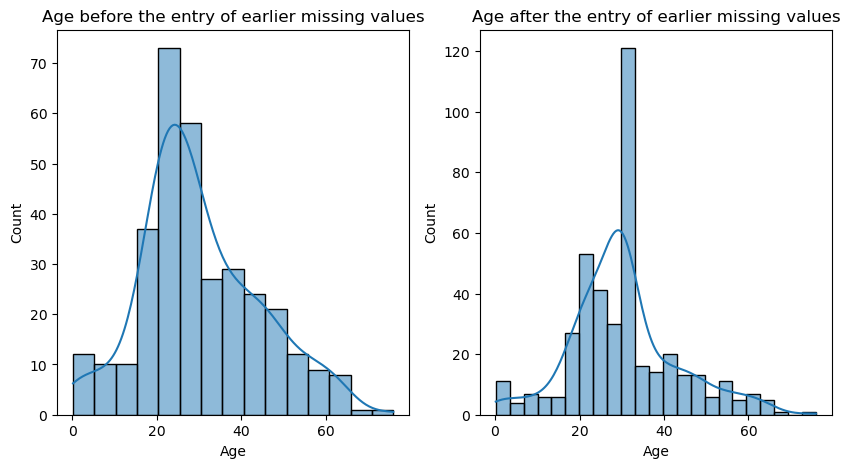

In [105]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Age'],ax=ax[0],kde=True)
sns.histplot(df['Age'].fillna(df['Age'].mean()),ax=ax[1],kde=True)
ax[0].set_title('Age before the entry of earlier missing values')
ax[1].set_title('Age after the entry of earlier missing values')
plt.show()

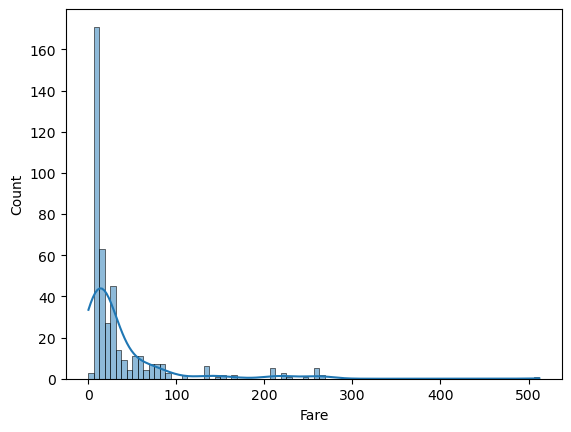

In [106]:
sns.histplot(data=df,x='Fare',kde=True)
plt.show()

The **Fare** column is right skewed there we will impute in with median

**The right-skewed means that the mean is greater than the median. The mean overestimates the most common values in a positively skewed distribution.** 

In [107]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [108]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.round(2)  # Round percentages to two digits
}, index=df.columns)
result_df

,no of missing values,percentage
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
Fare,0,0.0
Embarked,0,0.0


# 5. Exploratory Data Analysis:

**The mean is greater than the median. The mean overestimates the most common values in a positively skewed distribution.**

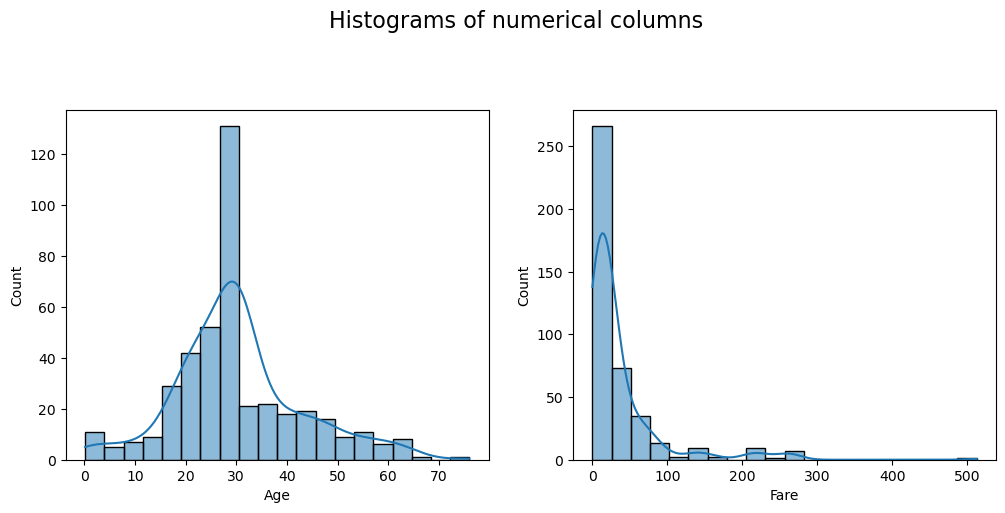

In [109]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
                  ):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()


**From this data we can see that all females survived**

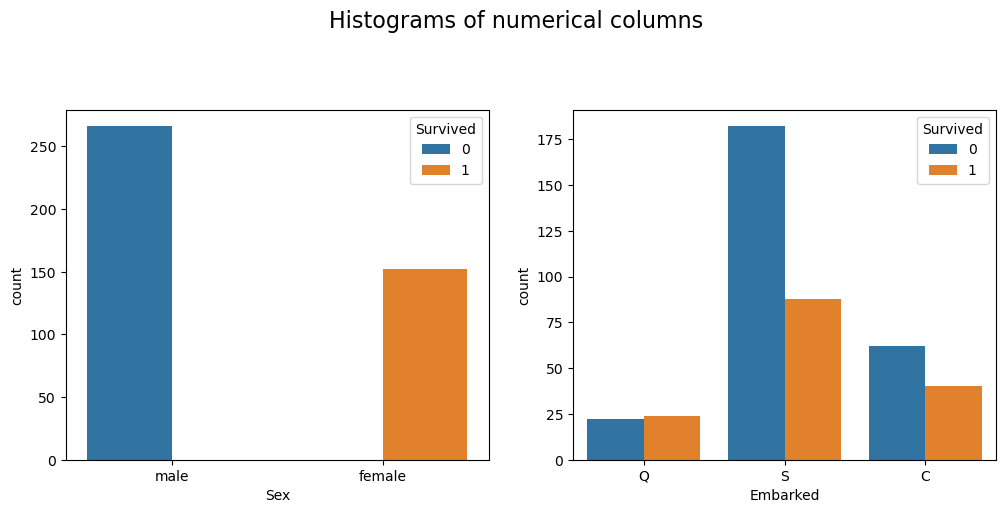

In [110]:
cat_columns=list(df.select_dtypes(include=['object']).columns)
num=int(len(cat_columns)/2) if int(len(cat_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.countplot(data=df,x=cat_columns[0],ax=ax[j][i],hue='Survived')
            cat_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

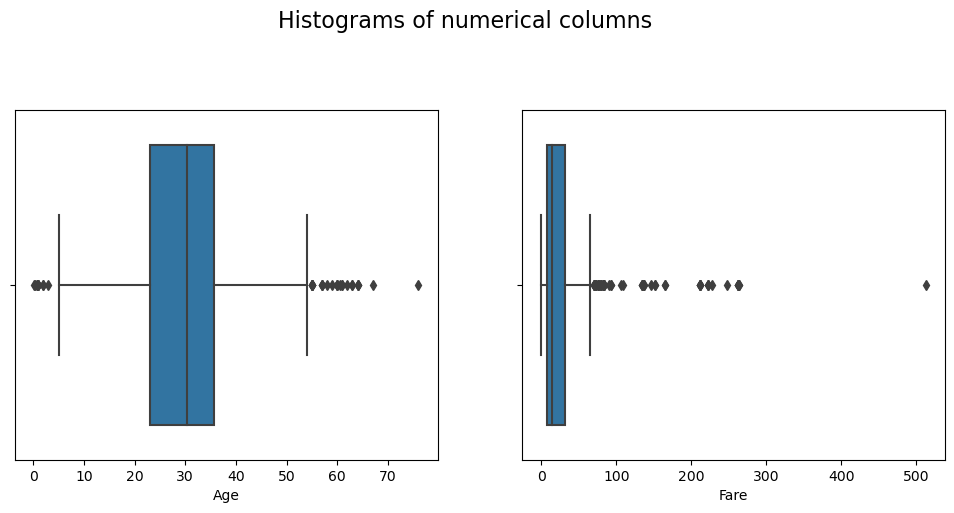

In [111]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

In [71]:
ft = FunctionTransformer(np.log1p)
qt = QuantileTransformer(output_distribution='normal')
x_f = pd.DataFrame(qt.fit_transform(df[['Fare','Age',]]),columns=['Fare','Age',])
x_f

C:\Users\choud\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.
  warnings.warn(


,Fare,Age
0,-0.819555,0.631708
1,-2.097253,1.224872
2,-0.333696,2.125161
3,-0.414296,-0.292657
4,-0.227360,-0.758016
...,...,...
413,-0.511340,0.208892
414,1.479193,0.832236
415,-1.444206,0.802848
416,-0.511340,0.208892


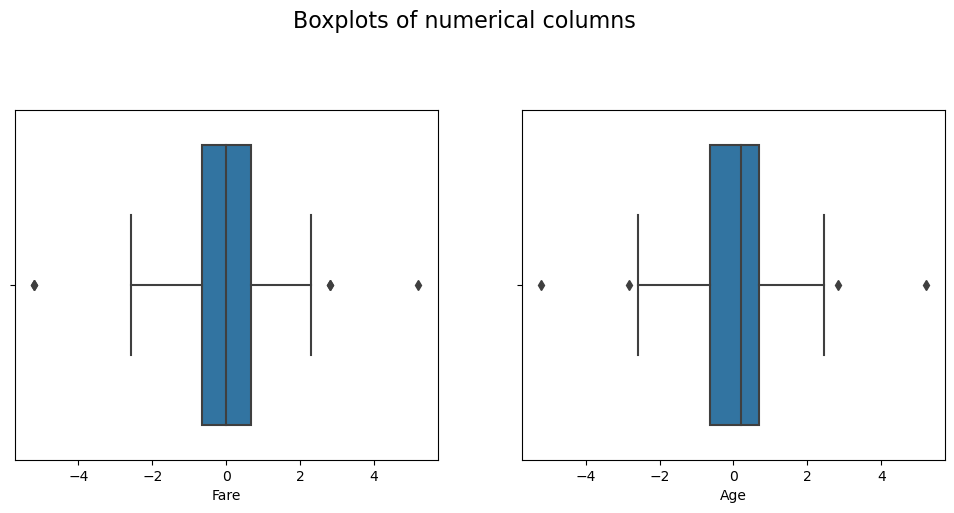

In [72]:
num_columns=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=x_f,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of numerical columns', fontsize=16)
plt.show()

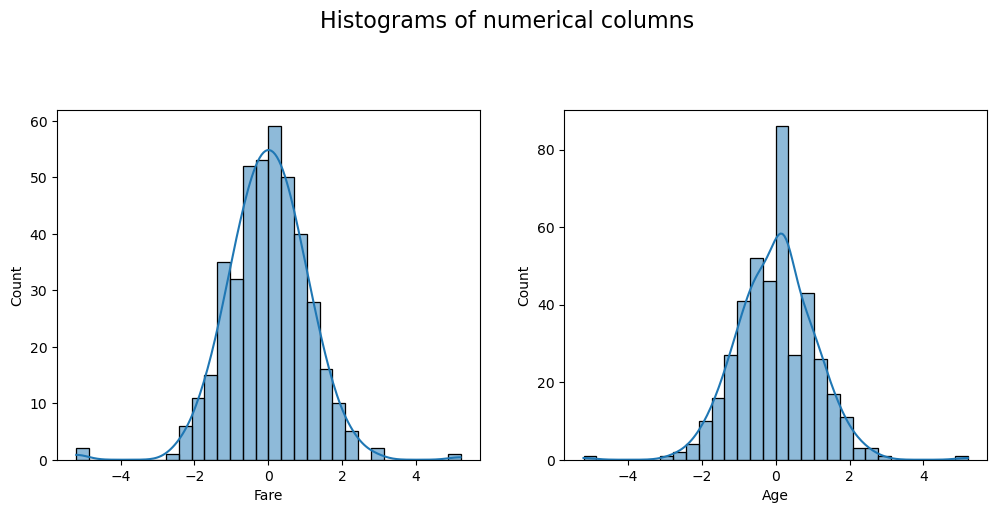

In [73]:
num_columns=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=x_f,x=num_columns[0],kde=True,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

# 6. Building of the model:

 Building a model in machine learning is creating a mathematical representation by generalizing and learning from training data. Then, the built machine learning model is applied to new data to make predictions and obtain results.

In [74]:
df = pd.get_dummies(df,drop_first=True,dtype='int')

In [75]:
df.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,7.8292,1,1,0
1,1,3,47.0,7.0000,0,0,1
2,0,2,62.0,9.6875,1,1,0
3,0,3,27.0,8.6625,1,0,1
4,1,3,22.0,12.2875,0,0,1


To scale the fare and age data we will use Quantile Transformer

In [76]:
qt = QuantileTransformer(output_distribution='normal')
df[['Fare','Age']] = qt.fit_transform(df[['Fare','Age']])

C:\Users\choud\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.
  warnings.warn(


# 7. Accuracy and Predictions using Logistic Regression:

It is used to predict the values of the data and get the accuracy results using the train and test of the x and y using Logistic Regression

In [77]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)
lg = LogisticRegression(solver='liblinear')
lg.fit(train_X,train_y)
y_pred = lg.predict(test_X)
accuracy_score(test_y,y_pred)

1.0

This Ml model is highly accurate as the accuracy score is next to perfect that is 1.0. It is generally very rare to get a accuracy score of 1.